In [ ]:
#############################################################################################################
#
#                                Machine Learning with Signal Processing
#                                      Stochastic Signal Analysis
#
#############################################################################################################

In [ ]:
#                                             Fourier Analysis
# we can see this in action. We have five sine-waves (blue signals) with amplitudes 4, 6, 8, 10 and 14 and frequencies 6.5, 5, 3, 1.5 and 1 Hz
# The Fast Analysis will be performed using Fourier Transform (FFT). It is an efficient algorithm for calculating the Discrete Fourier Transform (DFT).

IndexError: list index out of range

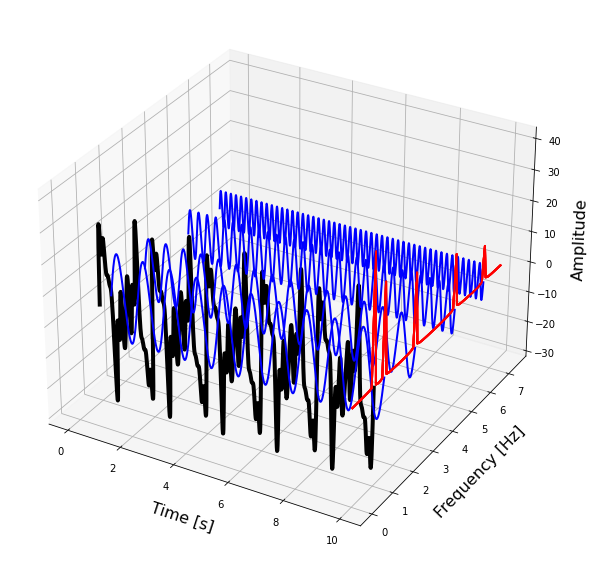

In [14]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
 
t_n = 10
N = 1000
T = t_n / N
f_s = 1/T
 
x_value = np.linspace(0,t_n,N)
amplitudes = [4, 6, 8, 10, 14]
frequencies = [6.5, 5, 3, 1.5, 1]
y_values = [amplitudes[ii]*np.sin(2*np.pi*frequencies[ii]*x_value) for ii in range(0,len(amplitudes))]
composite_y_value = np.sum(y_values, axis=0)
 
f_values, fft_values = get_fft_values(composite_y_value, T, N, f_s)
 
colors = ['k', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
 
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("\nTime [s]", fontsize=16)
ax.set_ylabel("\nFrequency [Hz]", fontsize=16)
ax.set_zlabel("\nAmplitude", fontsize=16)
 
y_values_ = [composite_y_value] + list(reversed(y_values))
frequencies = [1, 1.5, 3, 5, 6.5]
 
for ii in range(0,len(y_values_)):
    signal = y_values_[ii]
    color = colors[ii]
    length = signal.shape[0]
    x=np.linspace(0,10,1000)
    y=np.array([frequencies[ii]]*length)
    z=signal
 
    if ii == 0:
        linewidth = 4
    else:
        linewidth = 2
    ax.plot(list(x), list(y), zs=list(z), linewidth=linewidth, color=color)
 
    x=[10]*75
    y=f_values[:75]
    z = fft_values[:75]*3
    ax.plot(list(x), list(y), zs=list(z), linewidth=2, color='red')
    
    plt.tight_layout()
plt.show()

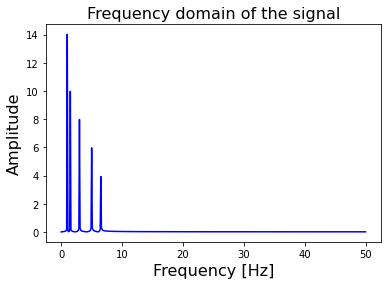

In [17]:
#################################################################################################################
#
#                                   The FFT in Python using SciPy fft package
#
#################################################################################################################

import matplotlib
import matplotlib.pyplot as plt
from scipy.fftpack import fft
 
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values
 
t_n = 10
N = 1000
T = t_n / N
f_s = 1/T
 
f_values, fft_values = get_fft_values(composite_y_value, T, N, f_s)
 
plt.plot(f_values, fft_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.show()

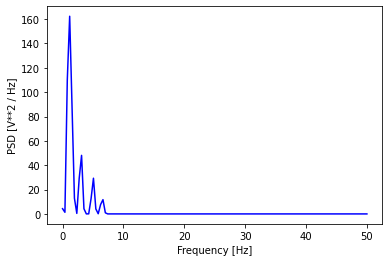

In [6]:
###################################################################################################################
#
#                        Power Spectral Desity (PSD)
# PSD in addition to the FFT it also takes the power distribution at each frequency (bin) into accounT
# Generally speaking the locations of the peaks in the frequency spectrum will be the same as in the FFT-case, 
# but the height and width of the peaks will differ.
####################################################################################################################


from scipy.signal import welch
 
def get_psd_values(y_values, T, N, f_s):
    f_values, psd_values = welch(y_values, fs=f_s)
    return f_values, psd_values
 
 
t_n = 10
N = 1000
T = t_n / N
f_s = 1/T
 
f_values, psd_values = get_psd_values(composite_y_value, T, N, f_s)
 
plt.plot(f_values, psd_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2 / Hz]')
plt.show()



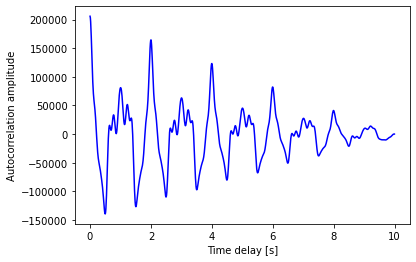

In [8]:
############################################################################################################################
#
#                                                Auto-correlation in Python
# The auto-correlation function calculates the correlation of a signal with a time-delayed version of itself.
#
############################################################################################################################


def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]
 
def get_autocorr_values(y_values, T, N, f_s):
    autocorr_values = autocorr(y_values)
    x_values = np.array([T * jj for jj in range(0, N)])
    return x_values, autocorr_values
 
t_n = 10
N = 1000
T = t_n / N
f_s = 1/T
 
t_values, autocorr_values = get_autocorr_values(composite_y_value, T, N, f_s)
 
plt.plot(t_values, autocorr_values, linestyle='-', color='blue')
plt.xlabel('Time delay [s]')
plt.ylabel('Autocorrelation amplitude')
plt.show()